In [79]:
import numpy as np
import matplotlib.pyplot as plt
import math

class KalmanPredictor:
    def kalman_meanR(self, data, rho, sigmaM, sigmaR):
        K1 = (2 * sigmaM**2) / (sigmaR * (math.sqrt(((rho + 1)**2) * sigmaR**2 + 4 * sigmaM**2) + rho * sigmaR + sigmaR) + 2 * (sigmaM**2))
        K2 = (2 * sigmaR) / (math.sqrt(((rho + 1)**2) * sigmaR**2 + 4 * sigmaM**2) - rho * sigmaR + sigmaR)
        K = np.array([K1, K2])

        M = [0]
        R = [data[0]]

        for i in range(1, len(data)):
            xhat = rho * M[i-1] + R[i-1]
            e = data[i] - xhat
            M.append(rho * (M[i-1] + K[0] * e))
            R.append(R[i-1] + K[1] * e)

        return M, R


class TimeSeriesSimulator:
    def __init__(self, a=0, p=0.8, sigma_M=1, sigma_R=0.1, T=1000):
        self.a = a
        self.p = p
        self.sigma_M = sigma_M
        self.sigma_R = sigma_R
        self.T = T
        self.M = np.zeros(T)
        self.R = np.zeros(T)
        self.Y = None

    def simulate(self):
        epsilon_M = np.random.normal(0, self.sigma_M, self.T)
        epsilon_R = np.random.normal(0, self.sigma_R, self.T)

        for t in range(1, self.T):
            self.M[t] = self.a + self.p * self.M[t-1] + epsilon_M[t]
            self.R[t] = self.R[t-1] + epsilon_R[t]
        
        self.Y = self.M + self.R

    def _plot_series(self, series, title, ylabel):
        plt.figure(figsize=(10, 6))
        plt.plot(series, label=ylabel)
        plt.axhline(y=np.mean(series), color='r', linestyle='-', label=f"Moyenne de {ylabel}")
        plt.legend()
        plt.title(title)
        plt.show()

    def plot_ratio_variance(self):
        var_M = self.sigma_M**2 / (1 - self.p**2)
        var_Y_t = var_M + np.arange(self.T) * self.sigma_R**2
        ratio_var = var_M / var_Y_t
        R2 = round(self.R2(), 2)
        
        plt.figure(figsize=(10, 6))
        plt.plot(ratio_var, label="Ratio de variance")
        plt.axhline(y=0.5, color='r', linestyle='--', label="Seuil de 0.5")
        plt.axhline(y = R2, color = 'g', linestyle='--', label = f"R2 papier : {R2}")
        plt.legend()
        
        plt.title("Ratio de la variance inconditionnelle de M_t à Y_t à travers le temps")
        plt.xlabel("Temps t")
        plt.ylabel("Ratio de variance")
        plt.show()

    def plot_unconditional_variance(self):
        var_M = self.sigma_M**2 / (1 - self.p**2)
        var_R_t = np.arange(self.T) * self.sigma_R**2
        var_Y_t = var_M + var_R_t
        
        plt.figure(figsize=(10, 6))
        plt.plot(np.full(self.T, var_M), label="Variance inconditionnelle de M_t")
        plt.plot(var_R_t, label="Variance inconditionnelle de R_t")
        plt.plot(var_Y_t, label="Variance inconditionnelle de Y_t")
        plt.legend()
        plt.title("Variance inconditionnelle de M_t, R_t et Y_t à travers le temps")
        plt.xlabel("Temps t")
        plt.ylabel("Variance inconditionnelle")
        plt.show()
        
    def R2(self):
        
        numerator = 2 * self.sigma_M**2
        denominator = 2 * self.sigma_M**2 + (1 + self.p) * self.sigma_R**2
    
        R2 = numerator / denominator
        return R2    

    def plot(self):
        if self.Y is None:
            print("Run the 'simulate' method before plotting!")
            return
        
        self._plot_series(self.M, "Série M_t avec sa moyenne", "M_t")
        self._plot_series(self.R, "Série R_t avec sa moyenne", "R_t")
        self._plot_series(self.Y, "Série Y_t avec sa moyenne", "Y_t = M_t + R_t")
        self.plot_ratio_variance()
        self.plot_unconditional_variance()




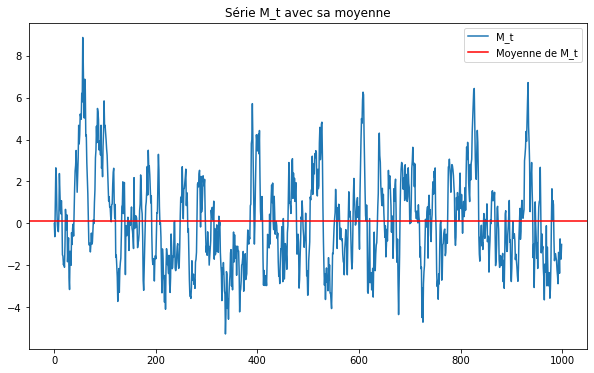

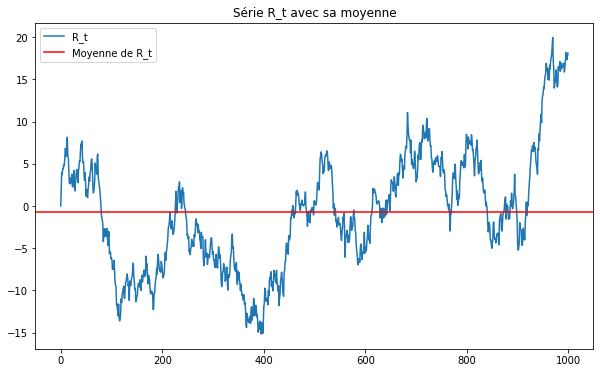

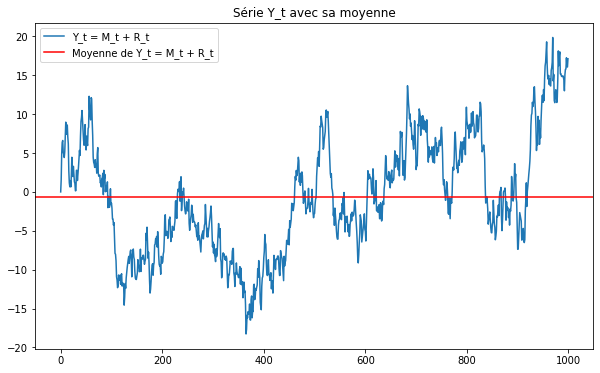

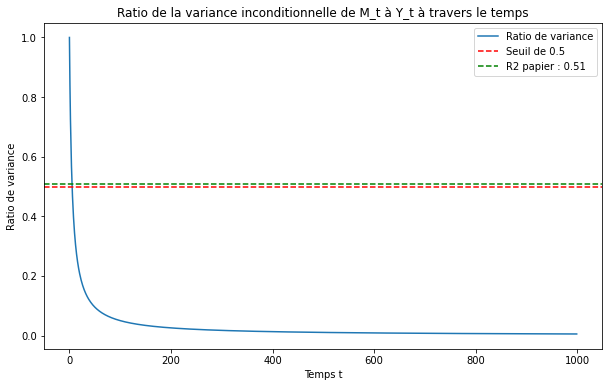

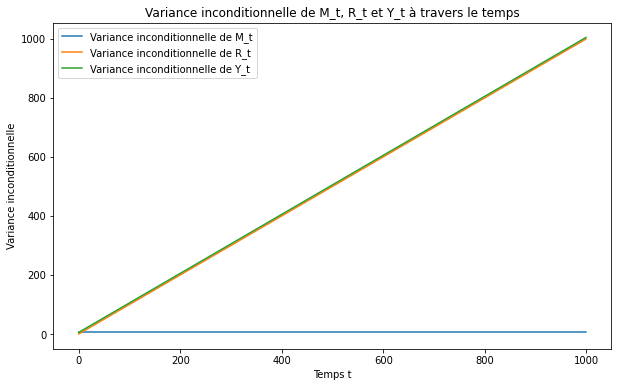

In [88]:
simulator = TimeSeriesSimulator(a=0, p=0.9, sigma_M=1, sigma_R=1, T=1000)

simulator.simulate()
simulator.plot()

## Cas 2 : Rt = alpha + B Rt-1 + errorRt


## Kalman Filter

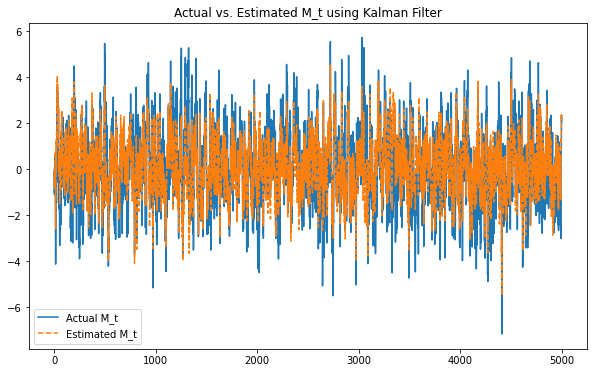

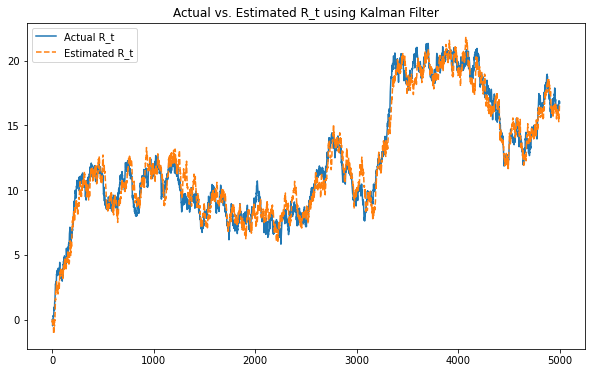

In [72]:

# Estimation
kalman_predictor = KalmanPredictor()
M_est, R_est = kalman_predictor.kalman_meanR(simulator.Y, simulator.p, simulator.sigma_M, simulator.sigma_R)

# Plotting the results for M_t
plt.figure(figsize=(10, 6))
plt.plot(simulator.M, label="Actual M_t")
plt.plot(M_est, linestyle='--', label="Estimated M_t")
plt.legend()
plt.title("Actual vs. Estimated M_t using Kalman Filter")
plt.show()

# Plotting the results for R_t
plt.figure(figsize=(10, 6))
plt.plot(simulator.R, label="Actual R_t")
plt.plot(R_est, linestyle='--', label="Estimated R_t")
plt.legend()
plt.title("Actual vs. Estimated R_t using Kalman Filter")
plt.show()




Estimate Kalman Filter 

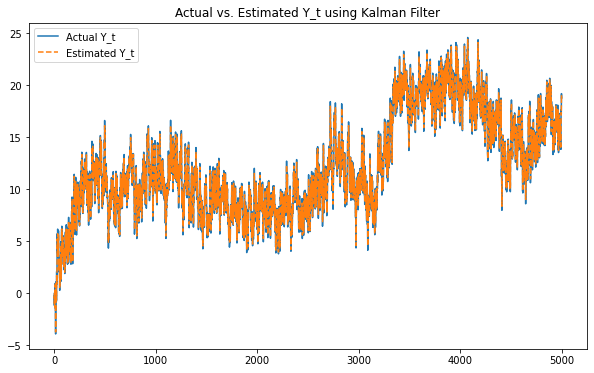

In [73]:
# Calculate estimated Y_t from the Kalman filter
Y_est = np.array(M_est) + np.array(R_est)

# Plotting the results for Y_t
plt.figure(figsize=(10, 6))
plt.plot(simulator.Y, label="Actual Y_t")
plt.plot(Y_est, linestyle='--', label="Estimated Y_t")
plt.legend()
plt.title("Actual vs. Estimated Y_t using Kalman Filter")
plt.show()
